### 20MAI0077
### Vivek Dadhich
### Assignment 5

In [ ]:
Github Repo link - 

[Dataset link](https://www.yelp.com/dataset)
<br>
</br>

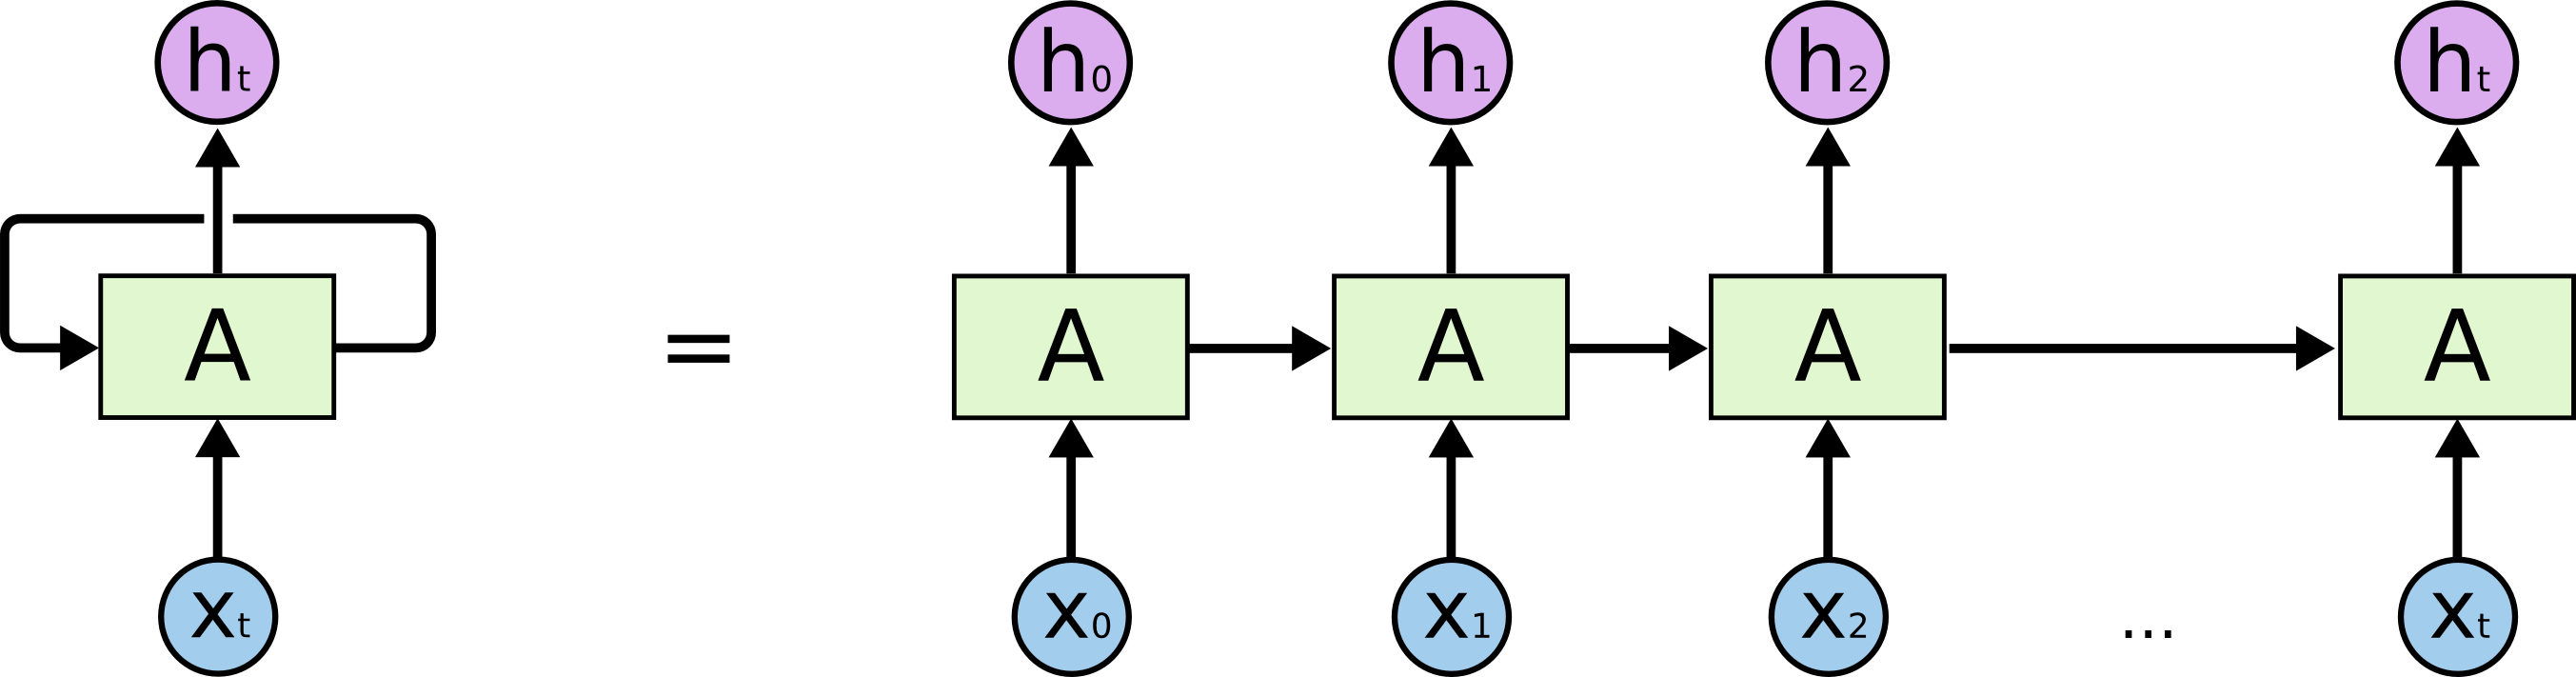

A typical RNN looks like above-where X(t) is input, h(t) is output and A is the neural network which gains information from the previous step in a loop. The output of one unit goes into the next one and the information is passed.

LSTM Networks
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

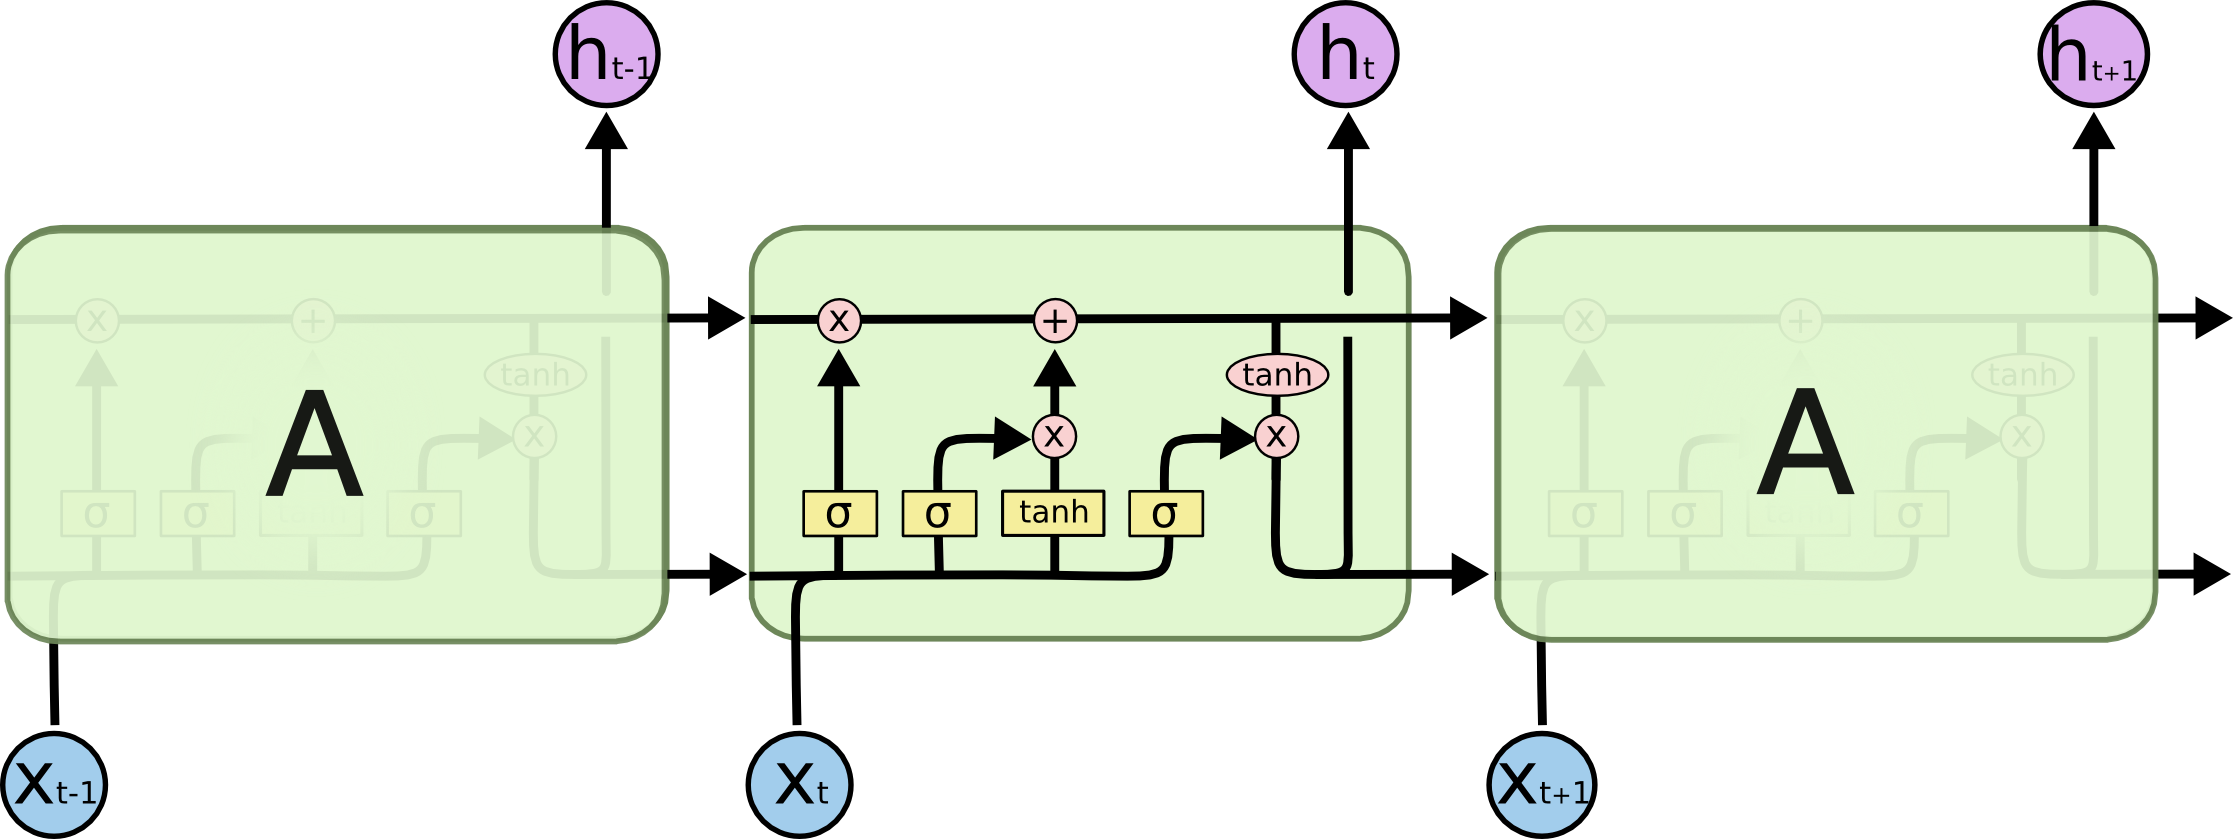

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

A LSTM neural network.
The repeating module in an LSTM contains four interacting layers.
Don’t worry about the details of what’s going on. We’ll walk through the LSTM diagram step by step later. For now, let’s just try to get comfortable with the notation we’ll be using.

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.


The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

An LSTM has three of these gates, to protect and control the cell state.

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

/Users/nimesh/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import json
import pandas as pd

def convert(x):
    ob = json.loads(x)
    for k, v in ob.items():
        if isinstance(v, list):
            ob[k] = ','.join(v)
        elif isinstance(v, dict):
            for kk, vv in v.items():
                ob['%s_%s' % (k, kk)] = vv
            del ob[k]
    return ob
json_filename='/Users/nimesh/Downloads/dataset/review.json'
with open(json_filename,'rb') as f:
    data = f.readlines()

df = pd.DataFrame([convert(line) for line in data])

In [3]:
del(data)

In [4]:
data = df[['text', 'stars']]

I have taken the ratings above 3 as positive

In [12]:
data['sentiment']=['pos' if (x>3) else 'neg' for x in data['stars']]

In [35]:
data['text']= [x.lower() for x in data['text']]
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [14]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

In [18]:
pd.set_option('display.max_colwidth',-1)
data[:5]

,text,stars,sentiment
2368526,I have been a Morenos customer since they day they opened \n\nWhen it opened the restaurant was pretty very awkward It was confusing if you were supposed to sit down walk up and order bus your own plates It made the restaurant uncomfortable\n\nHowever the food was fantastic I used to live across the street from the restaurant and ate their a few time a week The poritions were large and everything I ate was great Chicken cabeza lengua all fantastic Asada was not the best but it was still good The salsas were good but nothing memorable Rice and beans were always delicious Even the shrimp burrito was tasty\n\nEverything was great for the first year or so of the restaurant\n\nRecently they have made some refinements and it is just not as good While they have removed the akwardness from the restaurant they have reduced portion sizes and raised prices \n\nStill a good restaurant but not like it used to be\n\nDrinks are still VERY cheap at Morenos It was always hard for me to leave without knocking back a few Dos Equis,3,neg
3164135,The best in Wisconsin and being the dairy state thats saying a lot The ice cream is a great consistency and there are so many creative flavors like cake batter fudge zanziberry shortcake and sht just got serious Staff tends to be local kids which gives a nice friendly tone to the shop They also sell fudge candy and other treats This is a must stop in Madison for some good ice cream,5,pos
3299840,Jeff takes care of three yards in my neighborhood They all look great all the time If you need lawn service at a fair price xericare is it,5,pos
1216381,This is my Walmart of choice Is it busy yes as it is located by a couple of different 55 neighborhoods This store is clean well lit well stocked and the employees are friendly,4,pos
2854139,My husband has been talking about wanting to go to this place for several years We live about an hour away We actually had a day off yesterday so we drove up to try it out We sat outside on the porch which is really nice We had a table of five and we each ordered something different We had the Philly cheese pizza chicken pot pie pizza spinache pizza a supreme pizza and calzones We also got some cheesy bread and onion rings for an appetizer It was nice because we each got a small pizza and then try to each others They were all amazing Philly cheese was probably my favorite A couple people at our table got a berry cobbler also and that was sooooo yummy Took a while for our food to come out but they were busy so its understandable We will definitely be back,5,pos


In [19]:
data.dtypes

text         object
stars        int64 
sentiment    object
dtype: object

In [36]:
data['text']= [x.encode('ascii') for x in data['text']]


Vectorizing the text

In [37]:
tokenizer = Tokenizer(nb_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
tokenizer.fit_on_texts(data['text'].values)


In [ ]:
#print(tokenizer.word_index)

In [23]:
tokenizer

In [38]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [39]:
len(data)

47368

In [41]:
embed_dim = 128
lstm_out = 196
batch_size = 32

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = X.shape[1], dropout = 0.2))
model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/Users/nimesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/Users/nimesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 879, 128)          256000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

((37894, 879), (37894, 2))
((9474, 879), (9474, 2))


In [43]:
model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 1, verbose = 2)

Epoch 1/1
 - 2563s - loss: 0.4319 - acc: 0.8053


In [29]:
model

In [44]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

Score: 0.34
Validation Accuracy: 0.86
